<a href="https://colab.research.google.com/github/shruti9619/huggingface-nlp-course/blob/main/2_Behind_the_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers==4.48.3

# Coming from the HF NLP Course we saw how the pipeline works but now we dive into the details

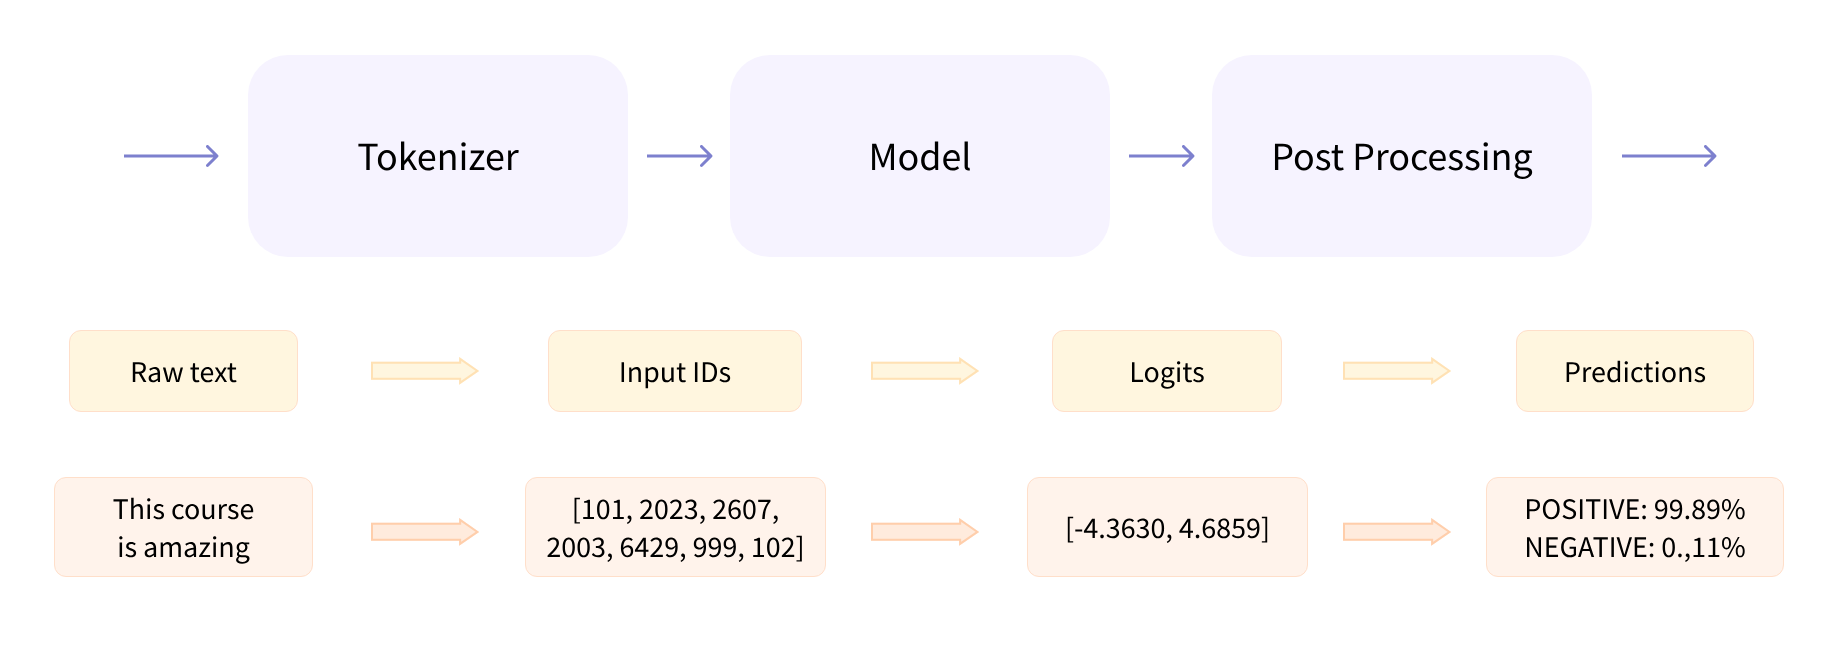

Source: https://huggingface.co/learn/nlp-course/chapter2/2?fw=pt

In [2]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


This is what happens next!

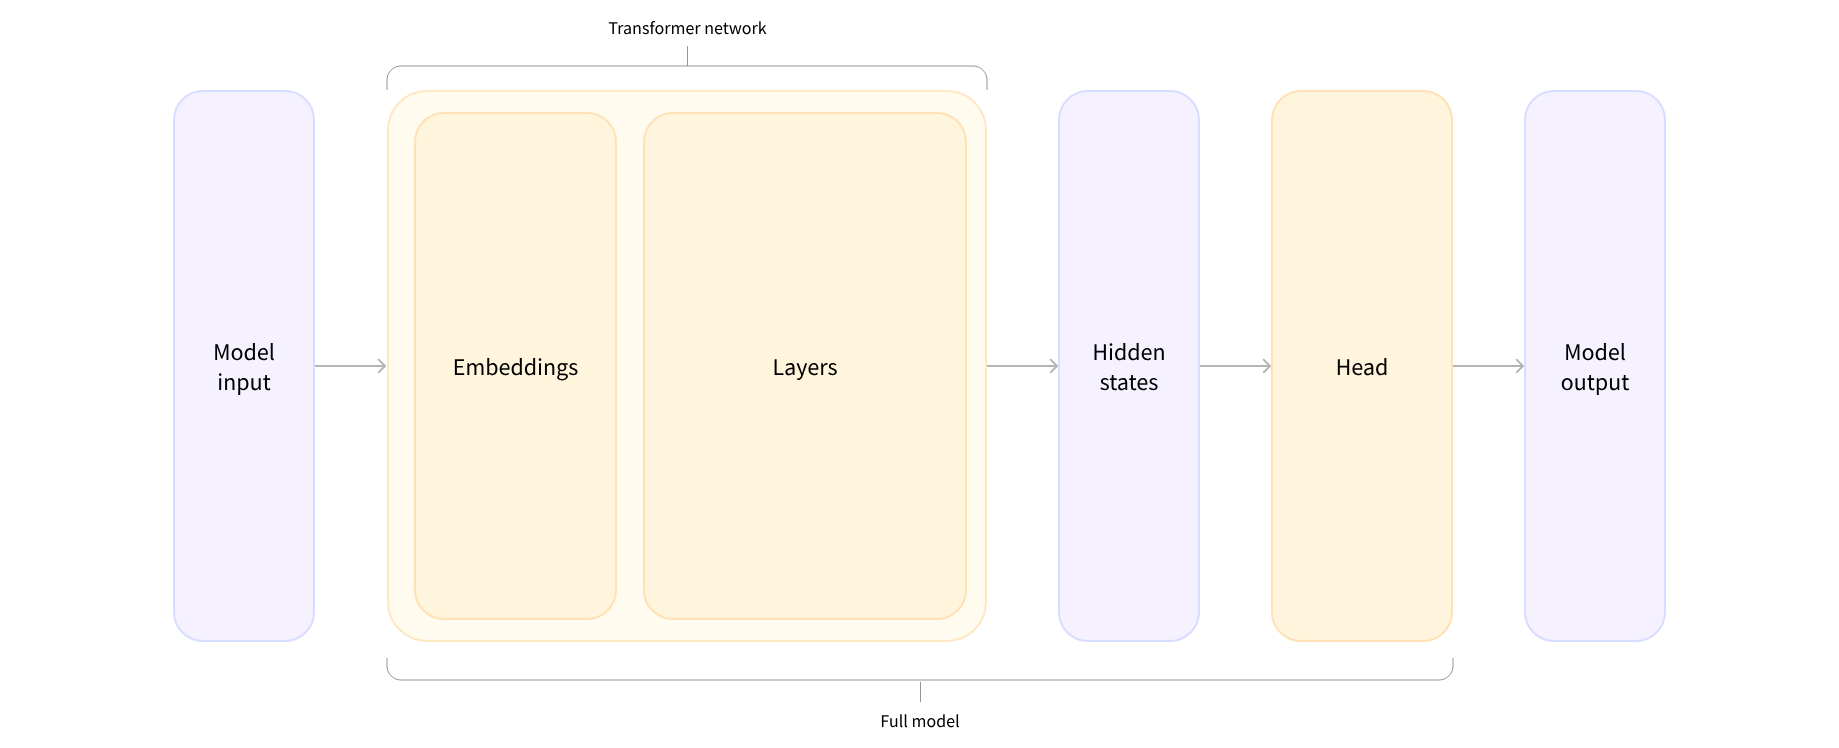

# Models in HF

What's AutoModel class, let's try to understand with a comparison from what is mentioned in the course about BertModel here https://huggingface.co/learn/nlp-course/chapter2/3?fw=pt

The distinction between `BertModel` and `AutoModel` in Hugging Face lies in their scope and use cases. Here’s a detailed comparison:

---

### **1. What They Are**
- **`BertModel`:**
  - A specific class that directly represents the core BERT architecture (without task-specific heads).
  - It's designed exclusively for BERT-based models, such as "bert-base-uncased" or "bert-large-cased".
  - Example usage:
    ```python
    from transformers import BertModel
    model = BertModel.from_pretrained("bert-base-uncased")
    ```

- **`AutoModel`:**
  - A generic, model-agnostic class designed to automatically select the appropriate architecture based on the model name or configuration.
  - It works with multiple transformer architectures (e.g., BERT, RoBERTa, DistilBERT, etc.).
  - Example usage:
    ```python
    from transformers import AutoModel
    model = AutoModel.from_pretrained("bert-base-uncased")  # Auto-detects it's BERT
    ```

---

### **2. Use Case and Flexibility**
- **`BertModel`:**
  - Use this when you're certain you want to work with BERT models specifically and don't need flexibility for other architectures.
  - It guarantees the use of the exact BERT model architecture.

- **`AutoModel`:**
  - Ideal for scenarios where:
    - The model architecture is not known in advance.
    - You want the flexibility to switch between different pretrained models without changing your code.
    - Example: You can load BERT, RoBERTa, or DistilBERT models by just changing the model name in `from_pretrained`.

---

### **3. Task-Specific Extensions**
Both `BertModel` and `AutoModel` provide the base transformer architecture. If you want a task-specific model with additional head layers (e.g., for classification, question-answering, etc.), you would use corresponding task-specific classes or their `Auto*` equivalents:
- **With `BertModel`:**
  - Use specific classes like `BertForSequenceClassification`, `BertForTokenClassification`, etc.
- **With `AutoModel`:**
  - Use `AutoModelForSequenceClassification`, `AutoModelForTokenClassification`, etc. These automatically adapt to the model's architecture.

---

### **4. Practical Differences**
| **Aspect**             | **BertModel**                                   | **AutoModel**                                    |
|-------------------------|------------------------------------------------|-------------------------------------------------|
| **Scope**              | BERT-specific architecture                     | Generic, supports multiple architectures       |
| **Flexibility**        | Only works with BERT-based models              | Works with any pretrained transformer model    |
| **Ease of Use**        | Requires explicitly importing the BERT class   | Automatically selects the correct architecture |
| **Supported Models**   | Only BERT-based (e.g., `bert-base-uncased`)    | Any model (e.g., BERT, RoBERTa, GPT, etc.)     |

---

### **Example: Switching Models Easily**
Let’s say you want to experiment with different transformer models:

- **With `BertModel`:**
  - You must explicitly import the relevant class for each model (e.g., `BertModel`, `RoBertaModel`).
  - Example:
    ```python
    from transformers import BertModel, RobertaModel

    bert_model = BertModel.from_pretrained("bert-base-uncased")
    roberta_model = RobertaModel.from_pretrained("roberta-base")
    ```

- **With `AutoModel`:**
  - You can dynamically load different architectures without changing the import.
  - Example:
    ```python
    from transformers import AutoModel

    bert_model = AutoModel.from_pretrained("bert-base-uncased")  # Loads BERT
    roberta_model = AutoModel.from_pretrained("roberta-base")    # Loads RoBERTa
    ```

---

### **Key Takeaway**
- Use `BertModel` if you know you’re working exclusively with BERT.
- Use `AutoModel` for flexibility and when working with multiple architectures. It simplifies code maintenance and experimentation.


In [9]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]


In [10]:
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))

[CLS] i've been waiting for a huggingface course my whole life. [SEP]
i've been waiting for a huggingface course my whole life.


You can see the difference. The tokenizer() is better to use to directly get the input pluggable in the model.

IMP: You can customize your cache folder by setting the HF_HOME environment variable.